In [393]:
# Graphics
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

# Analysis
import numpy as np
import geopandas as gpd
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sb

from pysal.model import spreg
from libpysal import weights
from pysal.explore import esda

#handle warnings
import warnings
warnings.filterwarnings("ignore")

In [394]:
ldn = gpd.read_file('data/ESRI/London_Ward.shp')
ldn = ldn[['GSS_CODE','geometry']]
ldn.rename(columns={"GSS_CODE" : "CODE"}, inplace=True)
ldn.dropna()
ldn.head()

,CODE,geometry
0,E05000405,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,E05000414,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,E05000401,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,E05000400,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,E05000402,"POLYGON ((522071.000 168144.900, 522063.900 16..."


In [395]:
ward = pd.read_csv('data/ward-profiles.csv', encoding='unicode_escape')
ward.rename(columns={"(ID2010) - Rank of average score (within London) - 2010" : "Deprivation"}, inplace=True)
ward.rename(columns={"% children in year 6 who are obese- 2011/12 to 2013/14" : "child_obesity"}, inplace=True)
ward.rename(columns={"Employment rate (16-64) - 2011" : "employment"}, inplace=True)
ward.rename(columns={"% dwellings in council tax bands A or B - 2015" : "council_tax_AorB"}, inplace=True)

ward.dropna()


,Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,...,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,City of London,00AA,E09000001,8100.0,650.0,6250.0,1250.0,8.0,76.9,15.2,...,662.9,210.5,656.4,85.3,0.4,18.6,0.4,7.9,5.3,48.5
1,Barking and Dagenham - Abbey,00ABFX,E05000026,14750.0,3850.0,10150.0,750.0,26.0,69.0,5.0,...,682.6,208.9,138.1,42.2,1.4,21.9,0.5,6.0,0.8,25.7
2,Barking and Dagenham - Alibon,00ABFY,E05000027,10600.0,2700.0,6800.0,1050.0,25.7,64.3,10.0,...,627.9,201.6,73.6,27.3,0.7,20.6,0.8,3.1,1.0,20.3
3,Barking and Dagenham - Becontree,00ABFZ,E05000028,12700.0,3200.0,8350.0,1100.0,25.4,65.9,8.7,...,632.0,207.9,79.9,27.6,1.2,1.9,0.9,2.9,1.6,22.5
4,Barking and Dagenham - Chadwell Heath,00ABGA,E05000029,10400.0,2550.0,6400.0,1450.0,24.3,61.5,14.2,...,613.9,210.5,76.1,24.6,1.3,56.0,0.9,2.3,1.2,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Westminster - St. James's,00BKGQ,E05000644,12050.0,1100.0,9650.0,1350.0,9.0,79.8,11.2,...,598.9,199.2,990.0,193.7,0.6,30.7,0.4,7.6,3.6,31.5
620,Westminster - Tachbrook,00BKGR,E05000645,8500.0,850.0,6350.0,1250.0,10.3,74.8,14.9,...,689.8,220.0,57.7,17.3,0.7,32.4,0.4,6.6,5.9,40.2
621,Westminster - Vincent Square,00BKGS,E05000646,10500.0,1500.0,7700.0,1350.0,14.2,73.1,12.6,...,639.4,195.4,82.4,25.0,0.2,26.4,0.4,6.9,4.3,37.8
622,Westminster - Warwick,00BKGT,E05000647,9800.0,1050.0,7550.0,1200.0,10.9,77.0,12.1,...,715.3,218.1,138.1,28.2,0.5,4.0,0.5,7.2,5.9,36.8


In [396]:
ward1 = ward.drop(columns = ['Ward name', 'Old code','New code'])
ward1.dropna()
ward1

,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,Mean Age - 2013,Median Age - 2013,Area - Square Kilometres,...,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,8100.0,650.0,6250.0,1250.0,8.0,76.9,15.2,41.3,39.0,3.2,...,662.9,210.5,656.4,85.3,0.4,18.6,0.4,7.9,5.3,48.5
1,14750.0,3850.0,10150.0,750.0,26.0,69.0,5.0,29.5,29.0,1.3,...,682.6,208.9,138.1,42.2,1.4,21.9,0.5,6.0,0.8,25.7
2,10600.0,2700.0,6800.0,1050.0,25.7,64.3,10.0,33.8,33.0,1.4,...,627.9,201.6,73.6,27.3,0.7,20.6,0.8,3.1,1.0,20.3
3,12700.0,3200.0,8350.0,1100.0,25.4,65.9,8.7,33.0,32.0,1.3,...,632.0,207.9,79.9,27.6,1.2,1.9,0.9,2.9,1.6,22.5
4,10400.0,2550.0,6400.0,1450.0,24.3,61.5,14.2,36.2,34.0,3.4,...,613.9,210.5,76.1,24.6,1.3,56.0,0.9,2.3,1.2,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,8500.0,850.0,6350.0,1250.0,10.3,74.8,14.9,40.2,37.0,0.4,...,689.8,220.0,57.7,17.3,0.7,32.4,0.4,6.6,5.9,40.2
621,10500.0,1500.0,7700.0,1350.0,14.2,73.1,12.6,38.2,35.0,0.7,...,639.4,195.4,82.4,25.0,0.2,26.4,0.4,6.9,4.3,37.8
622,9800.0,1050.0,7550.0,1200.0,10.9,77.0,12.1,38.2,34.0,0.6,...,715.3,218.1,138.1,28.2,0.5,4.0,0.5,7.2,5.9,36.8
623,13200.0,2750.0,9250.0,1200.0,20.8,70.2,9.0,34.3,33.0,0.7,...,676.0,206.6,75.5,25.3,0.5,19.2,0.4,4.9,5.1,29.6


<Axes: >

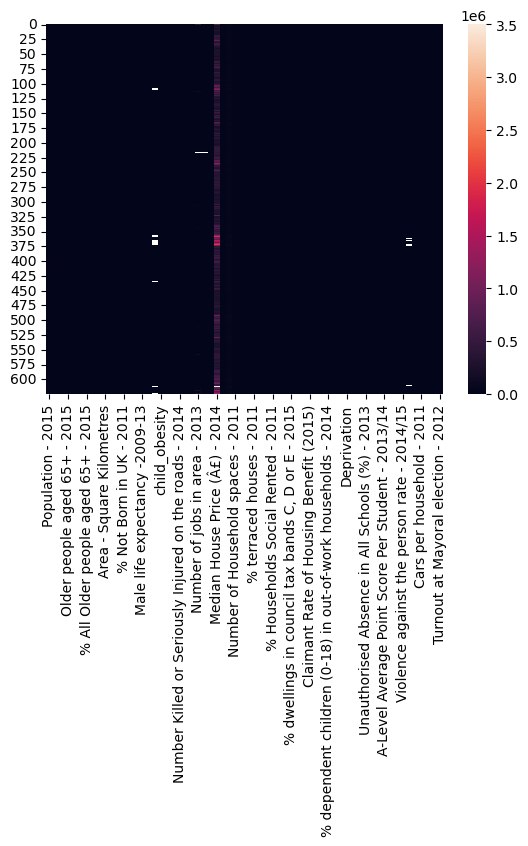

In [397]:
corr = ward1
sb.heatmap(corr)

In [398]:
corr1 = ward1[['Deprivation','% English is First Language of no one in household - 2011',
           'child_obesity', 'employment','council_tax_AorB','% area that is open space - 2014',
           '% with no qualifications - 2011',# 'Crime rate - 2014/15',
               'Average Public Transport Accessibility score - 2014','Turnout at Mayoral election - 2012']].corr()
corr1

,Deprivation,% English is First Language of no one in household - 2011,child_obesity,employment,council_tax_AorB,% area that is open space - 2014,% with no qualifications - 2011,Average Public Transport Accessibility score - 2014,Turnout at Mayoral election - 2012
Deprivation,1.000000,-0.451285,-0.701266,0.711035,-0.738654,0.188800,-0.477354,-0.357275,0.442910
% English is First Language of no one in household - 2011,-0.451285,1.000000,0.441609,-0.565631,0.257721,-0.314615,-0.049200,0.434520,-0.250213
child_obesity,-0.701266,0.441609,1.000000,-0.606181,0.565256,-0.190548,0.450447,0.290076,-0.551340
employment,0.711035,-0.565631,-0.606181,1.000000,-0.526168,0.076369,-0.532345,-0.185728,0.466085
council_tax_AorB,-0.738654,0.257721,0.565256,-0.526168,1.000000,-0.114263,0.351480,0.248360,-0.319382
% area that is open space - 2014,0.188800,-0.314615,-0.190548,0.076369,-0.114263,1.000000,0.184742,-0.467241,-0.011135
% with no qualifications - 2011,-0.477354,-0.049200,0.450447,-0.532345,0.351480,0.184742,1.000000,-0.384824,-0.510879
Average Public Transport Accessibility score - 2014,-0.357275,0.434520,0.290076,-0.185728,0.248360,-0.467241,-0.384824,1.000000,0.010884
Turnout at Mayoral election - 2012,0.442910,-0.250213,-0.551340,0.466085,-0.319382,-0.011135,-0.510879,0.010884,1.000000


<Axes: >

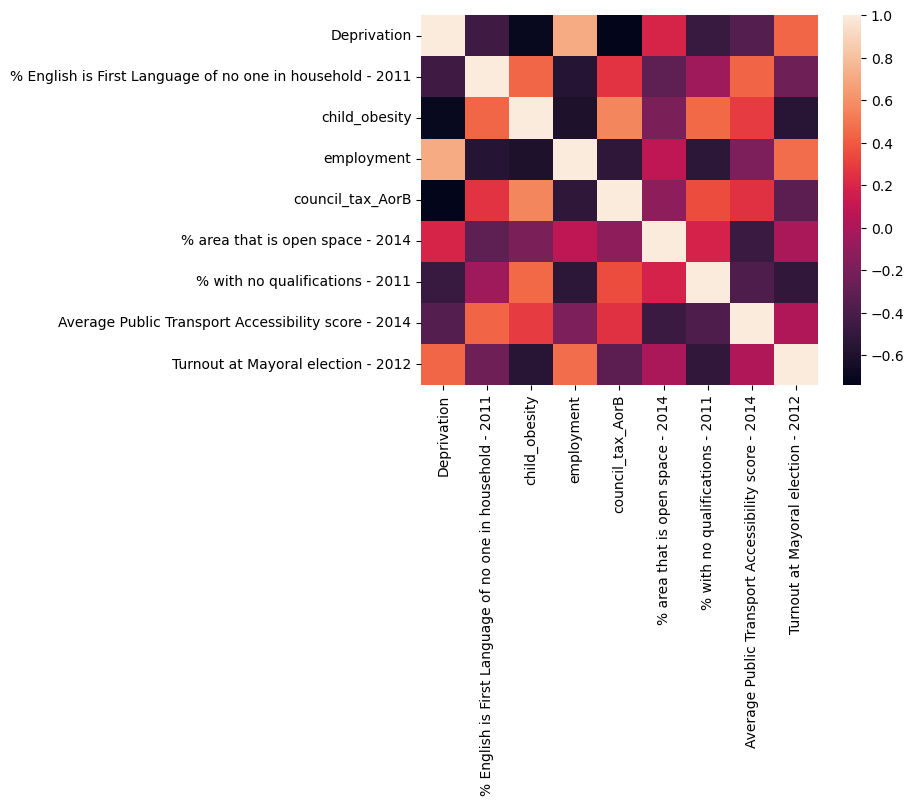

In [399]:
sb.heatmap(corr1)

In [400]:
corr1.style.background_gradient(cmap='coolwarm')

,Deprivation,% English is First Language of no one in household - 2011,child_obesity,employment,council_tax_AorB,% area that is open space - 2014,% with no qualifications - 2011,Average Public Transport Accessibility score - 2014,Turnout at Mayoral election - 2012
Deprivation,1.000000,-0.451285,-0.701266,0.711035,-0.738654,0.188800,-0.477354,-0.357275,0.442910
% English is First Language of no one in household - 2011,-0.451285,1.000000,0.441609,-0.565631,0.257721,-0.314615,-0.049200,0.434520,-0.250213
child_obesity,-0.701266,0.441609,1.000000,-0.606181,0.565256,-0.190548,0.450447,0.290076,-0.551340
employment,0.711035,-0.565631,-0.606181,1.000000,-0.526168,0.076369,-0.532345,-0.185728,0.466085
council_tax_AorB,-0.738654,0.257721,0.565256,-0.526168,1.000000,-0.114263,0.351480,0.248360,-0.319382
% area that is open space - 2014,0.188800,-0.314615,-0.190548,0.076369,-0.114263,1.000000,0.184742,-0.467241,-0.011135
% with no qualifications - 2011,-0.477354,-0.049200,0.450447,-0.532345,0.351480,0.184742,1.000000,-0.384824,-0.510879
Average Public Transport Accessibility score - 2014,-0.357275,0.434520,0.290076,-0.185728,0.248360,-0.467241,-0.384824,1.000000,0.010884
Turnout at Mayoral election - 2012,0.442910,-0.250213,-0.551340,0.466085,-0.319382,-0.011135,-0.510879,0.010884,1.000000


In [401]:
df = ward[['New code', 'Deprivation', 'child_obesity', 'employment', 'council_tax_AorB']]
df.rename(columns={"New code" : "CODE"}, inplace=True)
df

,CODE,Deprivation,child_obesity,employment,council_tax_AorB
0,E09000001,551.0,23.2,79.6,4.6
1,E05000026,166.0,24.7,60.3,45.2
2,E05000027,124.0,26.0,63.1,9.7
3,E05000028,185.0,29.3,61.2,13.4
4,E05000029,96.0,24.6,63.6,33.8
...,...,...,...,...,...
620,E05000645,398.0,32.0,75.2,6.3
621,E05000646,352.0,24.8,69.0,11.2
622,E05000647,387.0,25.2,73.8,3.1
623,E05000648,55.0,26.6,59.0,12.8


In [402]:
df = df[['CODE', 'Deprivation', 'child_obesity', 'employment', 'council_tax_AorB']]
df

,CODE,Deprivation,child_obesity,employment,council_tax_AorB
0,E09000001,551.0,23.2,79.6,4.6
1,E05000026,166.0,24.7,60.3,45.2
2,E05000027,124.0,26.0,63.1,9.7
3,E05000028,185.0,29.3,61.2,13.4
4,E05000029,96.0,24.6,63.6,33.8
...,...,...,...,...,...
620,E05000645,398.0,32.0,75.2,6.3
621,E05000646,352.0,24.8,69.0,11.2
622,E05000647,387.0,25.2,73.8,3.1
623,E05000648,55.0,26.6,59.0,12.8


In [403]:
merged = pd.merge(ldn, df, on = 'CODE')
merged.dropna()

,CODE,geometry,Deprivation,child_obesity,employment,council_tax_AorB
0,E05000405,"POLYGON ((516401.600 160201.800, 516407.300 16...",548.0,24.6,78.5,4.1
1,E05000414,"POLYGON ((517829.600 165447.100, 517837.100 16...",528.0,15.2,76.2,4.6
2,E05000401,"POLYGON ((518107.500 167303.400, 518114.300 16...",530.0,8.6,74.8,8.9
3,E05000400,"POLYGON ((520480.000 166909.800, 520490.700 16...",590.0,20.6,75.1,4.0
4,E05000402,"POLYGON ((522071.000 168144.900, 522063.900 16...",544.0,13.1,71.6,5.5
...,...,...,...,...,...,...
619,E05000034,"POLYGON ((549410.700 187450.700, 549437.700 18...",91.0,26.0,61.4,36.2
620,E05000042,"POLYGON ((547715.200 187914.200, 547845.400 18...",290.0,22.8,67.5,23.4
621,E05000030,"POLYGON ((549991.500 184928.500, 549988.900 18...",288.0,21.6,68.2,14.8
622,E05000029,"POLYGON ((547715.200 187914.200, 547712.500 18...",96.0,24.6,63.6,33.8


In [404]:
crime_mod = smf.ols("Deprivation ~ child_obesity", data=merged)
crime_mod_fit = crime_mod.fit()
print(crime_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Deprivation   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     607.3
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           4.37e-94
Time:                        10:56:52   Log-Likelihood:                -3916.3
No. Observations:                 624   AIC:                             7837.
Df Residuals:                     622   BIC:                             7845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       854.8618     22.580     37.859

Text(0, 0.5, 'Standardized Residuals (z)')

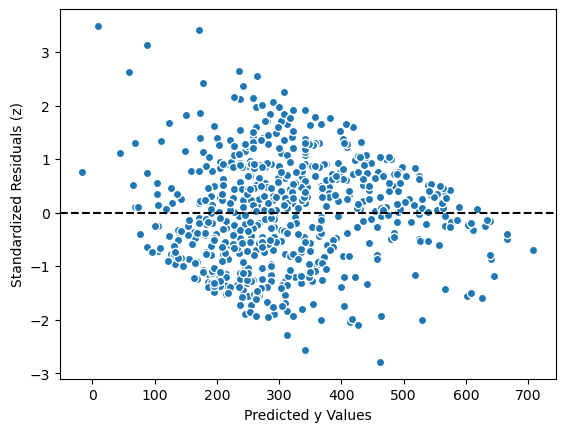

In [405]:
plt.plot(crime_mod_fit.fittedvalues, crime_mod_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)') 

In [406]:
crime_mod1 = smf.ols("Deprivation ~ employment", data=merged)
crime_mod1_fit = crime_mod1.fit()
print(crime_mod1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Deprivation   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     632.7
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           7.50e-97
Time:                        10:56:57   Log-Likelihood:                -3909.9
No. Observations:                 624   AIC:                             7824.
Df Residuals:                     622   BIC:                             7833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1066.9448     55.102    -19.363      0.0

Text(0, 0.5, 'Standardized Residuals (z)')

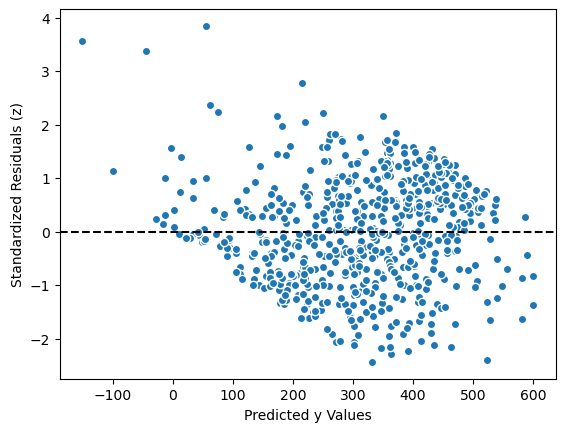

In [407]:
plt.plot(crime_mod1_fit.fittedvalues, crime_mod1_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)') 

In [408]:
crime_mod2 = smf.ols("Deprivation ~ council_tax_AorB", data=merged)
crime_mod2_fit = crime_mod2.fit()
print(crime_mod2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Deprivation   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     745.2
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          1.81e-108
Time:                        10:56:58   Log-Likelihood:                -3883.1
No. Observations:                 624   AIC:                             7770.
Df Residuals:                     622   BIC:                             7779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          475.8427      7.711  

Text(0, 0.5, 'Standardized Residuals (z)')

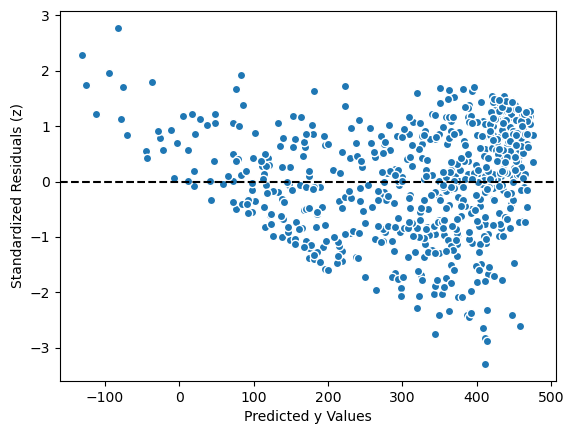

In [409]:
plt.plot(crime_mod2_fit.fittedvalues, crime_mod2_fit.resid_pearson, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)') 

In [410]:
final_mod = smf.ols("Deprivation ~ child_obesity + employment + council_tax_AorB", data=merged)
final_mod_fit = final_mod.fit()
print(final_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Deprivation   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     552.8
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          1.00e-174
Time:                        10:56:59   Log-Likelihood:                -3722.7
No. Observations:                 624   AIC:                             7453.
Df Residuals:                     620   BIC:                             7471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -30.0081     66.982  

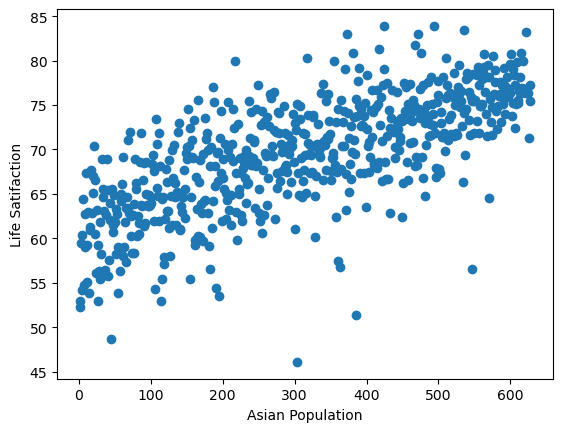

In [411]:
fig, ax = plt.subplots(1)
plt.scatter(merged['Deprivation'],merged['employment'])
ax.set_ylabel('Life Satifaction')
ax.set_xlabel('Asian Population')
plt.show()

In [412]:
wKNN8 = weights.KNN.from_dataframe(merged, k=8)
wKNN8.transform = 'r'

In [413]:
moran = esda.moran.Moran(merged['Deprivation'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.666
0.001


In [414]:
final_moran = esda.moran.Moran(final_mod_fit.resid_pearson, 
                                              wKNN8)
print(round(final_moran.I,3))
print(round(final_moran.p_sim,3))

0.505
0.001


In [415]:
#non-spatial error model
variable_names = ['child_obesity']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           2
S.D. dependent var  :    181.0116                Degrees of Freedom    :         622
R-squared           :      0.4940
Adjusted R-squared  :      0.4932
Sum squared residual:10328260.369                F-statistic           :    607.3172
Sigma-square        :   16604.920                Prob(F-statistic)     :   4.371e-94
S.E. of regression  :     128.860                Log likelihood        :   -3916.262
Sigma-square ML     :   16551.699                Akaike info criterion :    7836.524
S.E of regression ML:    128.6534                Schwarz criterion     :    7845.396

-----------------------------------------------------------------------------

In [416]:
#non-spatial error model
variable_names = ['employment']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           2
S.D. dependent var  :    181.0116                Degrees of Freedom    :         622
R-squared           :      0.5043
Adjusted R-squared  :      0.5035
Sum squared residual:10119256.302                F-statistic           :    632.7076
Sigma-square        :   16268.901                Prob(F-statistic)     :   7.498e-97
S.E. of regression  :     127.550                Log likelihood        :   -3909.883
Sigma-square ML     :   16216.757                Akaike info criterion :    7823.767
S.E of regression ML:    127.3450                Schwarz criterion     :    7832.639

-----------------------------------------------------------------------------

In [417]:
#non-spatial error model
variable_names = ['council_tax_AorB']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           2
S.D. dependent var  :    181.0116                Degrees of Freedom    :         622
R-squared           :      0.5451
Adjusted R-squared  :      0.5443
Sum squared residual: 9286469.937                F-statistic           :    745.2265
Sigma-square        :   14930.016                Prob(F-statistic)     :  1.813e-108
S.E. of regression  :     122.188                Log likelihood        :   -3883.088
Sigma-square ML     :   14882.163                Akaike info criterion :    7770.177
S.E of regression ML:    121.9925                Schwarz criterion     :    7779.049

-----------------------------------------------------------------------------

In [418]:
#non-spatial error model
variable_names = ['child_obesity', 'employment']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
R-squared           :      0.6208
Adjusted R-squared  :      0.6196
Sum squared residual: 7739776.593                F-statistic           :    508.4058
Sigma-square        :   12463.408                Prob(F-statistic)     :  1.683e-131
S.E. of regression  :     111.640                Log likelihood        :   -3826.246
Sigma-square ML     :   12403.488                Akaike info criterion :    7658.493
S.E of regression ML:    111.3709                Schwarz criterion     :    7671.801

-----------------------------------------------------------------------------

In [419]:
#non-spatial error model
variable_names = ['employment', 'council_tax_AorB']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
R-squared           :      0.6885
Adjusted R-squared  :      0.6875
Sum squared residual: 6358255.574                F-statistic           :    686.3375
Sigma-square        :   10238.737                Prob(F-statistic)     :  5.155e-158
S.E. of regression  :     101.187                Log likelihood        :   -3764.901
Sigma-square ML     :   10189.512                Akaike info criterion :    7535.803
S.E of regression ML:    100.9431                Schwarz criterion     :    7549.111

-----------------------------------------------------------------------------

In [420]:
#non-spatial error model
variable_names = ['child_obesity', 'council_tax_AorB']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
R-squared           :      0.6646
Adjusted R-squared  :      0.6635
Sum squared residual: 6847178.579                F-statistic           :    615.1583
Sigma-square        :   11026.052                Prob(F-statistic)     :  5.037e-148
S.E. of regression  :     105.005                Log likelihood        :   -3788.015
Sigma-square ML     :   10973.043                Akaike info criterion :    7582.030
S.E of regression ML:    104.7523                Schwarz criterion     :    7595.339

-----------------------------------------------------------------------------

In [341]:
#non-spatial error model
variable_names = ['child_obesity', 'employment', 'council_tax_AorB']

m1 = spreg.OLS(
    merged[['Deprivation']].values, 
               merged[variable_names].values,
               name_y='Deprivation',
               name_x=variable_names)
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           4
S.D. dependent var  :    181.0116                Degrees of Freedom    :         620
R-squared           :      0.7279
Adjusted R-squared  :      0.7266
Sum squared residual: 5554541.565                F-statistic           :    552.8249
Sigma-square        :    8958.938                Prob(F-statistic)     :  1.004e-174
S.E. of regression  :      94.652                Log likelihood        :   -3722.738
Sigma-square ML     :    8901.509                Akaike info criterion :    7453.476
S.E of regression ML:     94.3478                Schwarz criterion     :    7471.221

-----------------------------------------------------------------------------

In [342]:
m1_moran = esda.moran.Moran(m1.u, wKNN8)
print(round(m1_moran.I,3))
print(round(m1_moran.p_sim,3))

0.505
0.001


Text(0, 0.5, 'Residuals (z)')

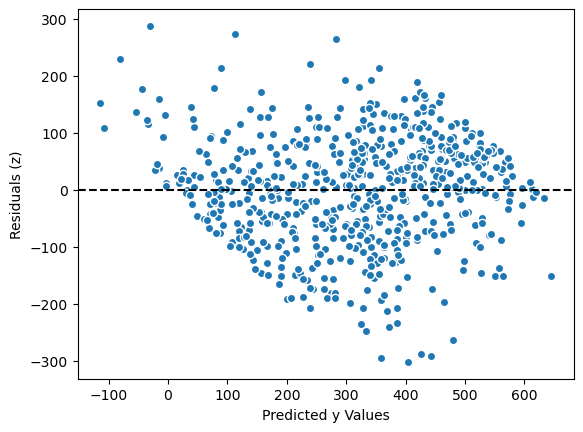

In [343]:
plt.plot(m1.predy, 
         m1.u, 
         'oC0',  
         markeredgecolor='white')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Residuals (z)') 

In [361]:
#spatial error
variable_name=['child_obesity']

l4_errm = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           2
S.D. dependent var  :    181.0116                Degrees of Freedom    :         622
Pseudo R-squared    :      0.4940
Sigma-square ML     :    7758.121                Log likelihood        :   -3720.668
S.E of regression   :      88.080                Akaike info criterion :    7445.337
                                                 Schwarz criterion     :    7454.209

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [367]:
l4_errm_moran = esda.moran.Moran(l4_errm.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

0.579
0.001


In [369]:
#spatial error
variable_name=['employment']

l4_errm1 = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           2
S.D. dependent var  :    181.0116                Degrees of Freedom    :         622
Pseudo R-squared    :      0.5043
Sigma-square ML     :    5553.386                Log likelihood        :   -3623.434
S.E of regression   :      74.521                Akaike info criterion :    7250.868
                                                 Schwarz criterion     :    7259.740

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [370]:
l4_errm_moran = esda.moran.Moran(l4_errm1.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

0.648
0.001


In [373]:
#spatial error
variable_name=['council_tax_AorB']

l4_errm = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm.summary)
l4_errm_moran = esda.moran.Moran(l4_errm.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           2
S.D. dependent var  :    181.0116                Degrees of Freedom    :         622
Pseudo R-squared    :      0.5451
Sigma-square ML     :    6699.351                Log likelihood        :   -3674.820
S.E of regression   :      81.850                Akaike info criterion :    7353.640
                                                 Schwarz criterion     :    7362.512

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [371]:
#spatial error
variable_name=['child_obesity','employment']

l4_errm = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm.summary)
l4_errm_moran = esda.moran.Moran(l4_errm.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
Pseudo R-squared    :      0.6045
Sigma-square ML     :    4836.548                Log likelihood        :   -3578.087
S.E of regression   :      69.545                Akaike info criterion :    7162.175
                                                 Schwarz criterion     :    7175.483

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [376]:
#spatial error
variable_name=['employment', 'council_tax_AorB']

l4_errm2 = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm2.summary)

l4_errm_moran = esda.moran.Moran(l4_errm2.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
Pseudo R-squared    :      0.6805
Sigma-square ML     :    4582.930                Log likelihood        :   -3558.219
S.E of regression   :      67.697                Akaike info criterion :    7122.438
                                                 Schwarz criterion     :    7135.747

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [391]:
#spatial error
variable_name=['child_obesity', 'council_tax_AorB']

l4_errm = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm.summary)
    
l4_errm_moran = esda.moran.Moran(l4_errm.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
Pseudo R-squared    :      0.6613
Sigma-square ML     :    5555.113                Log likelihood        :   -3612.399
S.E of regression   :      74.533                Akaike info criterion :    7230.798
                                                 Schwarz criterion     :    7244.106

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [378]:
#spatial error
variable_name=['child_obesity', 'employment', 'council_tax_AorB']

l4_errm = spreg.ML_Error(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  name_y='Deprivation',
                  w=wKNN8,
                  name_x=variable_name)
print(l4_errm.summary)
    
l4_errm_moran = esda.moran.Moran(l4_errm.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           4
S.D. dependent var  :    181.0116                Degrees of Freedom    :         620
Pseudo R-squared    :      0.7200
Sigma-square ML     :    4101.407                Log likelihood        :   -3522.327
S.E of regression   :      64.042                Akaike info criterion :    7052.654
                                                 Schwarz criterion     :    7070.399

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [347]:
l4_errm_moran = esda.moran.Moran(l4_errm.u,wKNN8)
print(round(l4_errm_moran.I,3))
print(round(l4_errm_moran.p_sim,3))

0.568
0.001


In [379]:
variable_name=['child_obesity']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='Deprivation',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
Pseudo R-squared    :      0.7623
Spatial Pseudo R-squared:  0.5803
Sigma-square ML     :    7805.396                Log likelihood        :   -3707.186
S.E of regression   :      88.348                Akaike info criterion :    7420.373
                                                 Schwarz criterion     :    7433.681

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [380]:
variable_name=['employment']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='Deprivation',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
Pseudo R-squared    :      0.7820
Spatial Pseudo R-squared:  0.4963
Sigma-square ML     :    7156.272                Log likelihood        :   -3680.240
S.E of regression   :      84.595                Akaike info criterion :    7366.481
                                                 Schwarz criterion     :    7379.789

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [381]:
variable_name=['council_tax_AorB']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='Deprivation',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           3
S.D. dependent var  :    181.0116                Degrees of Freedom    :         621
Pseudo R-squared    :      0.7629
Spatial Pseudo R-squared:  0.5284
Sigma-square ML     :    7778.636                Log likelihood        :   -3702.837
S.E of regression   :      88.197                Akaike info criterion :    7411.673
                                                 Schwarz criterion     :    7424.981

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [382]:
variable_name=['child_obesity', 'employment']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='Deprivation',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           4
S.D. dependent var  :    181.0116                Degrees of Freedom    :         620
Pseudo R-squared    :      0.8053
Spatial Pseudo R-squared:  0.6291
Sigma-square ML     :    6378.134                Log likelihood        :   -3637.653
S.E of regression   :      79.863                Akaike info criterion :    7283.307
                                                 Schwarz criterion     :    7301.051

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [383]:
variable_name=['employment', 'council_tax_AorB']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='Deprivation',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : Deprivation                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           4
S.D. dependent var  :    181.0116                Degrees of Freedom    :         620
Pseudo R-squared    :      0.8191
Spatial Pseudo R-squared:  0.6879
Sigma-square ML     :    5922.145                Log likelihood        :   -3610.234
S.E of regression   :      76.955                Akaike info criterion :    7228.468
                                                 Schwarz criterion     :    7246.212

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [392]:
variable_name=['child_obesity', 'council_tax_AorB']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='life_sat',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    life_sat                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           4
S.D. dependent var  :    181.0116                Degrees of Freedom    :         620
Pseudo R-squared    :      0.8001
Spatial Pseudo R-squared:  0.6644
Sigma-square ML     :    6546.472                Log likelihood        :   -3642.086
S.E of regression   :      80.910                Akaike info criterion :    7292.171
                                                 Schwarz criterion     :    7309.916

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [384]:
variable_name=['child_obesity', 'employment', 'council_tax_AorB']

l4_lagm = spreg.ML_Lag(merged[['Deprivation']].values,
                  merged[variable_name].values,
                  w=wKNN8,
                  name_y='life_sat',
                  name_x=variable_name)
print(l4_lagm.summary)

l4_lagm_moran = esda.moran.Moran(l4_lagm.u,wKNN8)
print(round(l4_lagm_moran.I,3))
print(round(l4_lagm_moran.p_sim,3))

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    life_sat                Number of Observations:         624
Mean dependent var  :    313.1202                Number of Variables   :           5
S.D. dependent var  :    181.0116                Degrees of Freedom    :         619
Pseudo R-squared    :      0.8319
Spatial Pseudo R-squared:  0.7244
Sigma-square ML     :    5502.502                Log likelihood        :   -3584.855
S.E of regression   :      74.179                Akaike info criterion :    7179.710
                                                 Schwarz criterion     :    7201.891

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------